**Data Analysis Pakistan's E-Commerce**
---
by Group B

---
**Main Business Questions:**
1. An e-commerce company thinks that doing marketing activities based on customer segments with common behaviors will increase income. For this reason, it is aimed to divide customers into segments and determine marketing strategies according to these segments.

---
> **Sub Business Questions:**
> 1. What is the shape of the customer segmentation results?
> 2. What are the characteristics of each group?
> 3. How to engage them with relevant campaigns?

---
**Scope:**
1. Location        : Pakistan
2. Date            : 2016 - 2018
3. Data Source     : https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset

---
**Hypothesis:**
RFM is a data-driven customer segmentation technique that allows marketers to take tactical decisions. It empowers marketers to quickly identify and segment users into homogeneous groups and target them with differentiated and personalized marketing strategies. This in turn improves user engagement and retention.


In [1]:
! chmod 600 /content/kaggle.json

In [2]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d zusmani/pakistans-largest-ecommerce-dataset

pakistans-largest-ecommerce-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_file = zipfile.ZipFile('/content/pakistans-largest-ecommerce-dataset.zip', 'r')
zip_file.extractall('/tmp/')

STEP 1: **DATA CLEANING**
---

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('/tmp/Pakistan Largest Ecommerce Dataset.csv')
df1

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.isna().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

There is a lot of blank data in the dataframe, especially in the last 5 columns. Some of the rows from the bottom also have empty data so they need to be cleaned.

In [6]:
df1.drop(["Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], axis = 1, inplace=True)
df1.dropna(subset=["item_id"], axis=0, inplace=True)

In [7]:
df1=df1.drop_duplicates()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [9]:
df1['status'].value_counts()

complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: status, dtype: int64

There are many order statuses, so it needs to be minimized.

In [10]:
df1['status'] = df1['status'].replace('complete', 'Completed')
df1['status'] = df1['status'].replace('closed', 'Completed')
df1['status'] = df1['status'].replace('received', 'Completed')
df1['status'] = df1['status'].replace('paid', 'Completed')
df1['status'] = df1['status'].replace('cod', 'Completed')
df1['status'] = df1['status'].replace('order_refunded', 'Cancelled')
df1['status'] = df1['status'].replace('refund', 'Cancelled')
df1['status'] = df1['status'].replace('exchange', 'Cancelled')
df1['status'] = df1['status'].replace('pending', 'Pending')
df1['status'] = df1['status'].replace('payment_review', 'Pending')
df1['status'] = df1['status'].replace('processing', 'Pending')
df1['status'] = df1['status'].replace('holded', 'Pending')
df1['status'] = df1['status'].replace('pending_paypal', 'Pending')
df1['status'] = df1['status'].replace(r'\\N', 'Pending', regex=True)
df1['status'] = df1['status'].replace('fraud', 'Cancelled')
df1['status'] = df1['status'].replace('canceled', 'Cancelled')

In [11]:
df1['status'].value_counts()

Completed    315487
Cancelled    268842
Pending         180
Name: status, dtype: int64

In [12]:
df1[df1['status'].isnull()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
477519,783751.0,NaN,3/15/2018,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,NaN,...,cod,3/15/2018,Gross,"8,000",2018.0,3.0,2018-3,3-2018,FY18,95141.0
513736,827187.0,NaN,4/16/2018,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,370,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513737,827189.0,NaN,4/16/2018,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,473,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513738,827191.0,NaN,4/16/2018,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,749,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513739,827193.0,NaN,4/16/2018,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,692,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513740,827195.0,NaN,4/16/2018,KABCOL5AB2B8019805C-8-9 Years,423.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,423,2018.0,4.0,2018-4,4-2018,FY18,105059.0
518706,832777.0,NaN,4/30/2018,ENTCLI5A5DD7D800D6E,6042.0,1.0,6042.0,100517141,Entertainment,NaN,...,cod,4/30/2018,Gross,"6,042",2018.0,4.0,2018-4,4-2018,FY18,106036.0
532965,848003.0,NaN,5/14/2018,MATINF5AE310D2D7A1A,13950.0,1.0,13950.0,100527966,Mobiles & Tablets,NaN,...,cod,5/14/2018,Gross,"13,950",2018.0,5.0,2018-4,5-2018,FY18,105319.0
542146,857829.0,NaN,5/25/2018,ROO5AE983F2751EA,2280.0,1.0,2280.0,100534786,Superstore,NaN,...,cod,5/25/2018,Gross,"2,280",2018.0,5.0,2018-5,5-2018,FY18,109580.0
554962,872154.0,NaN,6/15/2018,BAGPHI5AA665985A58E,2900.0,1.0,949.0,100542483,Beauty & Grooming,NaN,...,bankalfalah,6/15/2018,Gross,"2,900",2018.0,6.0,2018-5,6-2018,FY18,109420.0


In [13]:
df1.groupby('BI Status')['status'].value_counts()

BI Status  status   
#REF!      Completed         1
Gross      Cancelled    201259
           Pending         180
Net        Completed    234178
Valid      Completed     81308
           Cancelled     67583
Name: status, dtype: int64

an empty order status has a BI status value of "Gross". so it can be assumed the status value is "Cancelled" or "Pending"

In [14]:
df1['status'].fillna("Pending",inplace=True)

In [15]:
df1.isna().sum()

item_id                       0
status                        0
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [16]:
df1['category_name_1'].value_counts()

Mobiles & Tablets     115710
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7850
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

Item categories that have an empty value and \N are replaced with "Others". Sku and sales commission that have empty values are replaced with "Missing". Customer ID that has a blank value will be deleted.

In [17]:
df1['category_name_1'] = df1['category_name_1'].replace(r'\\N', 'Others', regex=True)
df1['category_name_1'].fillna("Others",inplace=True)

In [18]:
df1['sku'].fillna("Missing",inplace=True)

In [19]:
df1['sales_commission_code'].fillna("Missing",inplace=True)
df1['sales_commission_code'] = df1['sales_commission_code'].replace(r'\\N', 'Missing', regex=True)

In [20]:
df1.dropna(subset=["Customer ID"], axis=0, inplace=True)

In [21]:
df1.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

In [22]:
df1['payment_method'].value_counts()

cod                  271955
Payaxis               97640
Easypay               82896
jazzwallet            35145
easypay_voucher       31176
bankalfalah           23065
jazzvoucher           15633
Easypay_MA            14027
customercredit         7555
apg                    1758
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement        15
Name: payment_method, dtype: int64

Minimalized payment method.

In [23]:
df1['payment_method'] = df1['payment_method'].replace('Easypay_MA', 'Easypay')
df1['payment_method'] = df1['payment_method'].replace('easypay_voucher', 'Easypay')
df1['payment_method'] = df1['payment_method'].replace('jazzvoucher', 'jazzwallet')
df1['payment_method'] = df1['payment_method'].replace('cashatdoorstep', 'cod')
df1['payment_method'] = df1['payment_method'].replace(['marketingexpense','financesettlement','productcredit', 'internetbanking', 'mygateway', 'mcblite', 'ublcreditcard', 'apg'], 'Others')

In [24]:
df1['payment_method'].value_counts()

cod               272687
Easypay           128099
Payaxis            97640
jazzwallet         50778
bankalfalah        23065
customercredit      7555
Others              4689
Name: payment_method, dtype: int64

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584513 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584513 non-null  float64
 1   status                 584513 non-null  object 
 2   created_at             584513 non-null  object 
 3   sku                    584513 non-null  object 
 4   price                  584513 non-null  float64
 5   qty_ordered            584513 non-null  float64
 6   grand_total            584513 non-null  float64
 7   increment_id           584513 non-null  object 
 8   category_name_1        584513 non-null  object 
 9   sales_commission_code  584513 non-null  object 
 10  discount_amount        584513 non-null  float64
 11  payment_method         584513 non-null  object 
 12  Working Date           584513 non-null  object 
 13  BI Status              584513 non-null  object 
 14   MV                    584513 non-nu

Customize the data type.

In [26]:
df1[["item_id"]] = df1[["item_id"]].astype("str")
df1[["Month"]] = df1[["Month"]].astype("int")
df1[["Year"]] = df1[["Year"]].astype("int")
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1[["qty_ordered"]] = df1[["qty_ordered"]].astype("int")
df1[["Customer ID"]] = df1[["Customer ID"]].astype("int")
df1[["increment_id"]] = df1[["increment_id"]].astype("str")

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584513 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584513 non-null  object        
 1   status                 584513 non-null  object        
 2   created_at             584513 non-null  datetime64[ns]
 3   sku                    584513 non-null  object        
 4   price                  584513 non-null  float64       
 5   qty_ordered            584513 non-null  int64         
 6   grand_total            584513 non-null  float64       
 7   increment_id           584513 non-null  object        
 8   category_name_1        584513 non-null  object        
 9   sales_commission_code  584513 non-null  object        
 10  discount_amount        584513 non-null  float64       
 11  payment_method         584513 non-null  object        
 12  Working Date           584513 non-null  obje

In [28]:
df1.describe()

,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,5.845130e+05,584513.000000,5.845130e+05,584513.000000,584513.000000,584513.000000,584513.000000
mean,6.348821e+03,1.296375,8.530676e+03,499.502175,2017.044097,7.167746,45790.511965
std,1.494940e+04,3.996094,6.132138e+04,1506.955668,0.707349,3.486270,34414.962389
min,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,4.070000e+03,1.000000,6.999000e+03,160.520000,2018.000000,11.000000,73536.000000
max,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


There is a negative value that is impossible to happen, so it needs to be cleaned.

In [29]:
df1 = df1[df1.grand_total > 0]

In [30]:
df = df1.copy()
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,Missing,...,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,7-2016,FY17,1
1,211133.0,Cancelled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,Missing,...,cod,7/1/2016,Gross,240,2016,7,2016-7,7-2016,FY17,2
2,211134.0,Cancelled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,Missing,...,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,7-2016,FY17,3
3,211135.0,Completed,2016-07-01,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016,7,2016-7,7-2016,FY17,4
4,211136.0,Cancelled,2016-07-01,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,Missing,...,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,7-2016,FY17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,Completed,2018-08-28,WOFSCE5AE00357AECDE,699.0,1,849.0,100562385,Women's Fashion,Missing,...,cod,8/28/2018,Valid,699,2018,8,2018-8,8-2018,FY19,115320
584520,905205.0,Pending,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1,35899.0,100562386,Mobiles & Tablets,Missing,...,bankalfalah,8/28/2018,Gross,"35,599",2018,8,2018-8,8-2018,FY19,115326
584521,905206.0,Pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2,652178.0,100562387,Mobiles & Tablets,Missing,...,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,8-2018,FY19,113474
584522,905207.0,Pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2,652178.0,100562387,Mobiles & Tablets,Missing,...,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,8-2018,FY19,113474


STEP 2: **EDA**
---



In [31]:
dfe = df.copy()

<AxesSubplot:>

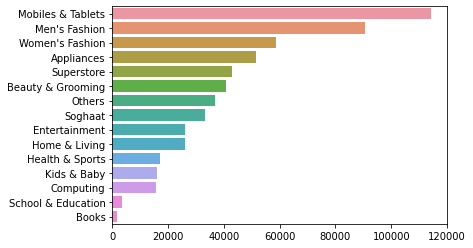

In [32]:
vals=dfe['category_name_1'].value_counts().values
cats=dfe['category_name_1'].value_counts().index
import seaborn as sns
sns.barplot(x=vals,y=cats,data=df)

<AxesSubplot:>

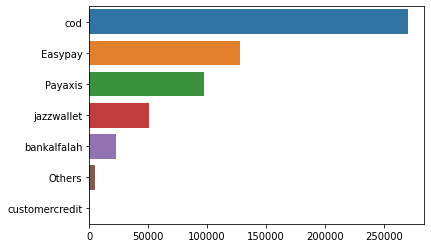

In [33]:
valp=dfe['payment_method'].value_counts().values
catp=dfe['payment_method'].value_counts().index
sns.barplot(x=valp,y=catp,data=df)

STEP 3: **RFM SEGMENTATION**
---



In [34]:
ecommerce = df.copy()
ecommerce = ecommerce.loc[ecommerce['status']=='Completed',:].reset_index()

In [35]:
ecommerce['Working Date'] = pd.to_datetime(ecommerce['Working Date'])
ref_date = ecommerce['Working Date'].max()
ecommerce['Date'] = ecommerce['Working Date'].apply(lambda x: x.date())
ecommerce['Most_Recent_Purchase'] = ecommerce.groupby('Customer ID')['Date'].transform(max)
ecommerce['Recency'] = (ref_date.date() - ecommerce.Most_Recent_Purchase).astype('timedelta64[D]')

In [36]:
ecommerce = ecommerce.drop('Most_Recent_Purchase', axis=1)

In [37]:
ecommerce['Frequency'] = ecommerce.groupby('Customer ID')['increment_id'].transform('nunique')

In [38]:
ecommerce['Monetary'] = ecommerce.groupby('Customer ID')['grand_total'].transform(sum)

In [39]:
RFM_df = ecommerce[['Customer ID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()
RFM_df

,Customer ID,Recency,Frequency,Monetary
0,1,788.0,1,1950.00
1,4,1.0,229,1316173.25
2,7,500.0,4,105.00
3,6,788.0,1,170.00
4,9,788.0,1,5500.00
...,...,...,...,...
307990,115323,0.0,1,44499.00
307991,114857,0.0,1,150.00
307992,115324,0.0,1,549.00
307994,115325,0.0,2,1199.00


In [40]:
RFM_df["recency_score"] = pd.qcut(RFM_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df["frequency_score"] = pd.qcut(RFM_df["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df["monetary_score"]= pd.qcut(RFM_df["Monetary"],5,labels=[1,2,3,4,5])
RFM_df

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,1,788.0,1,1950.00,1,1,2
1,4,1.0,229,1316173.25,5,5,5
2,7,500.0,4,105.00,2,5,1
3,6,788.0,1,170.00,1,1,1
4,9,788.0,1,5500.00,1,1,3
...,...,...,...,...,...,...,...
307990,115323,0.0,1,44499.00,5,4,5
307991,114857,0.0,1,150.00,5,4,1
307992,115324,0.0,1,549.00,5,4,1
307994,115325,0.0,2,1199.00,5,5,2


In [41]:
RFM_df["RFM_SCORE"] = (RFM_df["recency_score"].astype(str) + RFM_df["frequency_score"].astype(str))

In [42]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
RFM_df['segment'] = RFM_df['RFM_SCORE'].replace(seg_map, regex=True)
RFM_df

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,1,788.0,1,1950.00,1,1,2,11,hibernating
1,4,1.0,229,1316173.25,5,5,5,55,champions
2,7,500.0,4,105.00,2,5,1,25,cant_loose
3,6,788.0,1,170.00,1,1,1,11,hibernating
4,9,788.0,1,5500.00,1,1,3,11,hibernating
...,...,...,...,...,...,...,...,...,...
307990,115323,0.0,1,44499.00,5,4,5,54,champions
307991,114857,0.0,1,150.00,5,4,1,54,champions
307992,115324,0.0,1,549.00,5,4,1,54,champions
307994,115325,0.0,2,1199.00,5,5,2,55,champions


In [43]:
RFM_df[["segment", "Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count"]).round()

Recency        Frequency        Monetary       
                       mean  count      mean  count     mean  count
segment                                                            
about_to_sleep        343.0   8266       1.0   8266   5643.0   8266
at_Risk               581.0   4442       2.0   4442  10078.0   4442
cant_loose            562.0   3809       8.0   3809  34271.0   3809
champions              85.0  11563       5.0  11563  54021.0  11563
hibernating           596.0  23449       1.0  23449   6864.0  23449
loyal_customers       277.0  11901       5.0  11901  41751.0  11901
need_attention        280.0   1603       1.0   1603   8666.0   1603
potential_loyalists   200.0  14254       1.0  14254   7983.0  14254

**Reviews About the Segments**
---
Now, let's focus on some segments which can be critically important for marketing strategies

1. cant_loose
2. need_attention
3. champions
4. loyal_customers

---
**1. Cant Loose**

**Insight:**
1. There are 3809 people in this segment.
2. Shopping was done on average 562 days ago.
3. The frequency of shopping is 8.
4. Average spending is 34271 RS / 449,59 USD.

Even if the last purchase was made 562 days, the total number of purchases is high. It is a group of customers who do not come for a long time, but also make a lot of purchases when they come. 

**Recommendation:** New campaign strategies based on rewards, discounts, and other special incentives as a way to attract and retain customers can be planned in order to make them feel special and loyal again.

---
**2. Need Attention**

**Insight:**
1. There are 1603 people in this segment.
2. Shopping was done on average 280 days ago.
3. The frequency of shopping is 1.
4. Average spending is 8666 RS / 113,69 USD.

Although they dont make purchase frequently, total transaction amounts of these customers contribute to profitability.

**Recommendation:** As a result, Cashback and bonus campaigns can be organized for this segment to retain customers and even move them to a segment that makes more purchases. In fact, discounted product offers and campaigns based on gift coupons can be planned by observing habits of other customers with similar behaviors, and analyzing according product association rules.

---
**3. Champions**

**Insight:**
1. There are 11563 people in this segment.
2. Shopping was done on average 52 days ago.
3. The frequency of shopping is 5.
4. Average spending is 54021 RS / 708,68 USD.

This segment constitutes 11563 customers who have made their last purchases within the last week and generate an average turnover of 708,68 USD. 

**Recommendation:** Because of this segment consists of customers most frequently spends and can easily adopt to new products and services, cross-sales strategies can be taken for this segment.

**4. Loyal Customers**

**Insight:**
1. There are 11901 people in this segment.
2. Shopping was done on average 277 days ago.
3. The frequency of shopping is 5.
4. Average spending is 41751 RS / 547,71 USD.

There are 11901 customers in this segment, and while the purchasing frequency is 5 on average in all customer segments. The average monetary value of this segment is 547,71 USD.

**Recommendation:** As a conclusion, in order to ensure customer loyalty sustainable, cross-sell communications in line with customer expectations and needs can be organized for this segment.